## Multi Objective Optimization example



In [1]:
from mewpy.simulation import SimulationMethod, get_simulator
from mewpy.problems import RKOProblem, ROUProblem
from mewpy.optimization.evaluation import BPCY,WYIELD
from mewpy.optimization import EA
from collections import OrderedDict

%matplotlib notebook

from reframed.io.sbml import load_cbmodel
model = load_cbmodel('models/yeast/iMM904SL_v6.xml', flavor='cobra')


BIOMASS_ID = 'R_biomass_SC5_notrace'
PRODUCT_ID = 'R_EX_tyr_L_e_'
O2 = 'R_EX_o2_e_'
GLC = 'R_EX_glc_e_'
envcond = {GLC: (-10.0,999999.0), O2: (-12.25,100000.0)}
model.set_objective({BIOMASS_ID:1})

# compute reference flux values (optional)
simulation = get_simulator(model,envcond= envcond) 
res = simulation.simulate(method=SimulationMethod.pFBA)
reference = res.fluxes


# The evaluation (objective) functions
evaluator_1 = WYIELD(BIOMASS_ID, PRODUCT_ID)
evaluator_2 = BPCY(BIOMASS_ID, PRODUCT_ID, uptake = GLC, method=SimulationMethod.lMOMA ,reference=reference)

# The KO optimization problem
problem = ROUProblem( model, 
                      fevaluation=[evaluator_1,evaluator_2], 
                      envcond = envcond,  
                      candidate_max_size = 10)

<IPython.core.display.Javascript object>


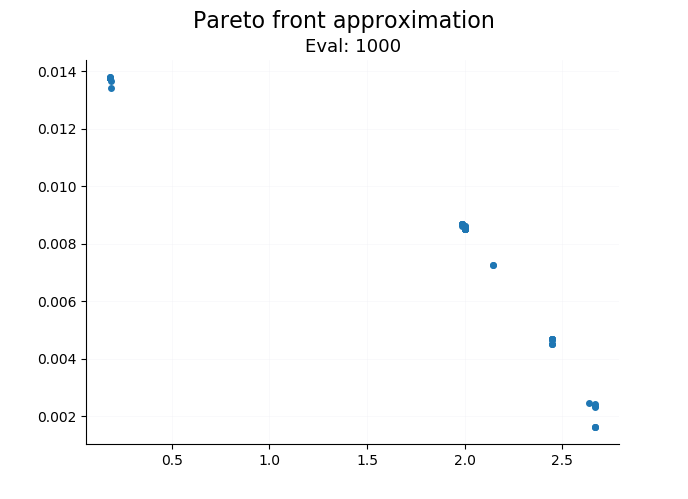

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  2.666341  0.009087  0.314429  0.802022|  0.000000  0.013568  0.000000  0.000207  0.001355|
    200|  0.000000  2.666341  0.009087  0.497181  0.954948|  0.000000  0.013694  0.000002  0.000516  0.002312|
    300|  0.000000  2.666341  0.916075  1.194978  1.162680|  0.000000  0.013780  0.000261  0.001971  0.004384|
    400|  0.006936  2.666341  2.443983  1.831322  1.081289|  0.000114  0.013780  0.000584  0.004029  0.005792|
    500|  0.184052  2.666341  1.999265  1.419052  1.130104|  0.000280  0.013780  0.002395  0.006651  0.006222|
    600|  0.184052  2.666341  1.999265  1.501487  1.116113|  0.000280  0.013780  0.007994  0.007071  0.005689|
    700|  0.185017  2.666341  2.443983  2.024085  0.920476|  0.000280  0.013788  0.004512  0.005699  0.004699|
    800|  0.185017  2.666341  1.999265  1.913814  0.901489|  0.000440  0.013788  0.008421  0.006889  0.004306|
 

In [3]:

# A new instance of the EA optimizer for the problem
# The stopping criteria is set to 10 generations (1100 evaluations)
# though the stopping criteria should contemplate much more evaluations.

ea = EA(problem, max_generations = 10,visualizer = True,mp=True)
# runs the optimization
final_pop = ea.run()

In [ ]:
# Save the obtained solutions to csv
import mewpy.utils.utilities as util
util.population_to_csv(problem,final_pop,'results.csv')

In [4]:
print(final_pop[1])

[0.18651109989653752, 0.01364905753945545]
OrderedDict([('R_ILETA', (0, 0.0)), ('R_ADA', (0, 0.0)), ('R_DNMPPA', (0, 0.0)), ('R_TYRTAim', (0.30965111361210873, 10000)), ('R_FAS120', (0.0, 10000)), ('R_AGAT_SC', (0.11803059423177559, 10000)), ('R_FA180ACPtm', (0.0, 10000))])


<IPython.core.display.Javascript object>


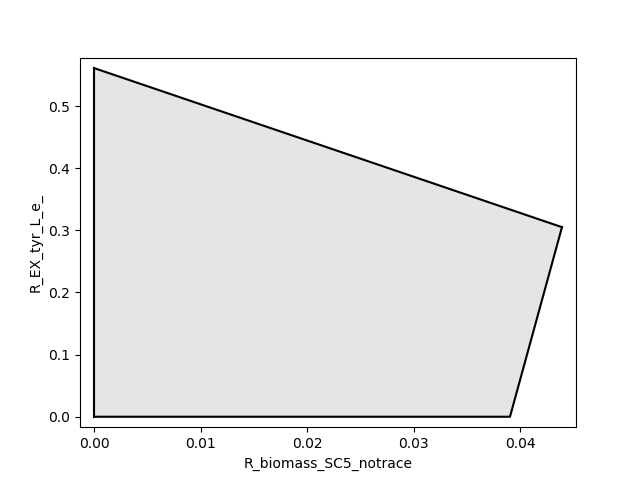

In [6]:
from mewpy.visualization.envelope import plot_flux_envelope
constraints = final_pop[1].get_constraints()
plot_flux_envelope(model,BIOMASS_ID,PRODUCT_ID,constraints=constraints)